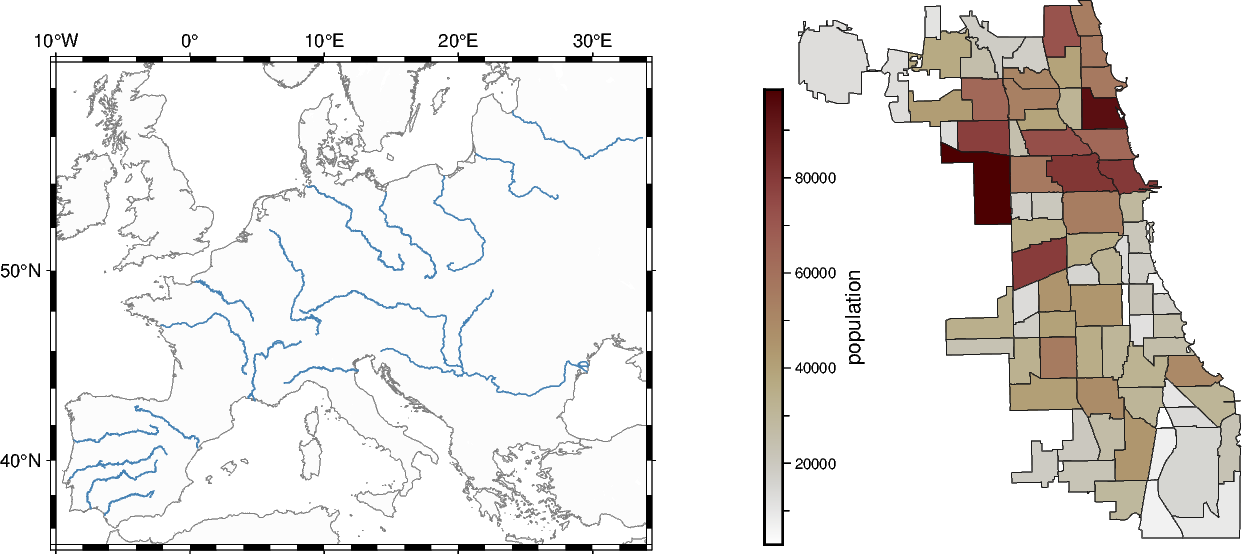

In [3]:
import geopandas as gpd
import pygmt

fig = pygmt.Figure()

fig.coast(
    projection="M10c",
    region=[-10, 34, 35, 59],
    land="gray99",
    shorelines="1/0.1p,gray50",
    frame=["WsNe", "af"],
)

gpd_rivers_org = gpd.read_file(
    "https://www.eea.europa.eu/data-and-maps/data/wise-large-rivers-and-large-lakes/"
    + "zipped-shapefile-with-wise-large-rivers-vector-line/"
    + "zipped-shapefile-with-wise-large-rivers-vector-line/"
    + "at_download/file/wise_large_rivers.zip"
)
gpd_rivers = gpd_rivers_org.to_crs("EPSG:4326")

# Plot the lines with pen
fig.plot(data=gpd_rivers, pen="0.5p,steelblue,solid")


fig.shift_origin(xshift="w+1.5c")


fig.basemap(region=[-88, -87.5, 41.64, 42.04], projection="M9c", frame="rtlb")

gdf_airbnb = gpd.read_file(
    "https://geodacenter.github.io/data-and-lab//data/airbnb.zip"
)
popul_min = gdf_airbnb["population"].min()
popul_max = gdf_airbnb["population"].max()
pygmt.makecpt(cmap="SCM/bilbao", series=[popul_min, popul_max, 10])
fig.colorbar(frame="x+lpopulation", position="jBL+jBL+o0.5c/0c+v")

# Plot the polygons with color-coding for the population
fig.plot(
    data=gdf_airbnb,
    pen="0.2p,gray10",
    fill="+z",
    cmap=True,
    aspatial="Z=population",
)

fig.show(dpi=150)